In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Level 1

Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Fetching dataset from csv file

In [3]:
df = pd.read_csv('/kaggle/input/cc-ml-task-dataset/Dataset.csv')

In [ ]:
df.dtypes

Histograms of the three unknown features.

Text(0, 0.5, 'Count')

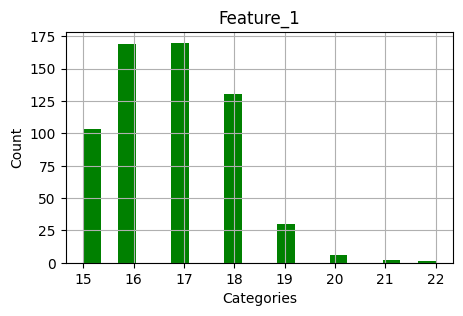

In [4]:
df['Feature_1'].hist(bins=20, figsize=(5, 3), color='green')
plt.title('Feature_1')
plt.xlabel('Categories')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

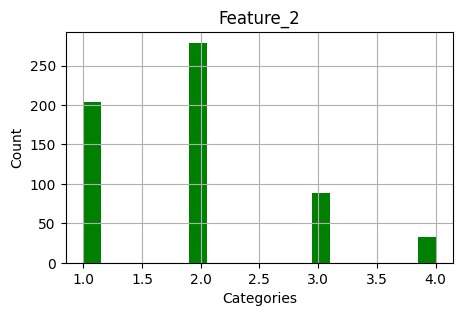

In [5]:
df['Feature_2'].hist(bins=20, figsize=(5, 3), color='green')
plt.title('Feature_2')
plt.xlabel('Categories')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

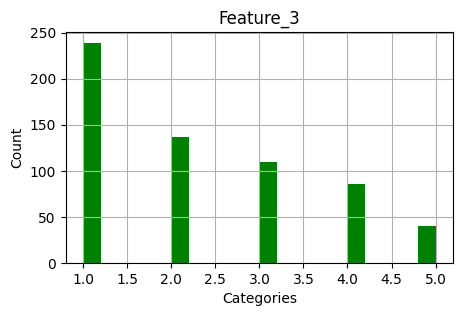

In [6]:
df['Feature_3'].hist(bins=20, figsize=(5, 3), color='green')
plt.title('Feature_3')
plt.xlabel('Categories')
plt.ylabel('Count')

Correlation heatmap of the dataset.

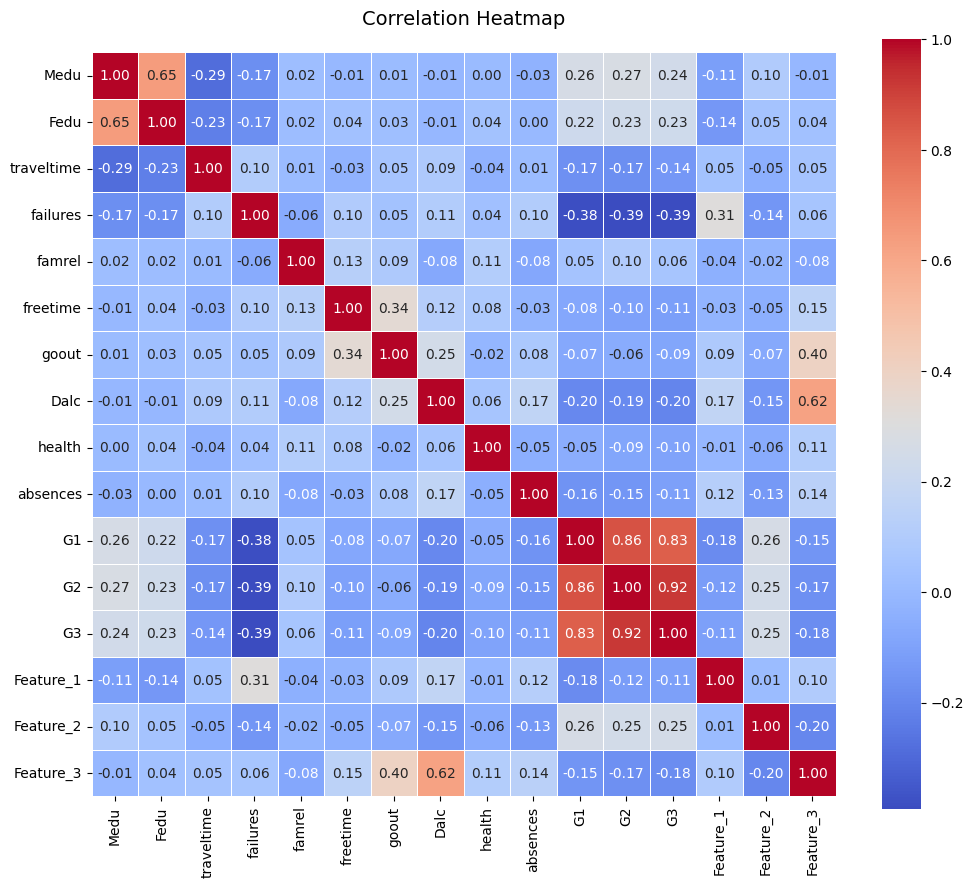

In [7]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))  
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5,)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Correlation Heatmap", fontsize=14, pad=20)
plt.show()

**Conclusion**

Feature_1 -> **age** as from the histogram, we see that the values vary from 15 to 22 and the count               is max at 16 and 17.
Feature_2 -> **studytime** as it has a good correlation with grades and negative correlation with                 goout, freetime etc.
Feature_3 -> **partytime** as it has strong correlation with goout and Dacl.

Renaming the unknown column names with respective guesses.

In [8]:
df.rename(columns={'Feature_1': 'age'}, inplace=True)
df.rename(columns={ 'Feature_2': 'studytime'}, inplace=True)
df.rename(columns={'Feature_3': 'partytime'}, inplace=True)

# Level 2

Finding the number of missing values in each column of the dataset.

In [9]:
df.isnull().sum()

school         0
sex            0
address        0
famsize       50
Pstatus        0
Medu           0
Fedu          73
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime    73
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher        76
internet       0
famrel         0
freetime      45
goout          0
Dalc           0
health         0
absences      69
G1             0
G2            35
G3             0
age           38
studytime     46
partytime     39
romantic       0
dtype: int64

Filling the empty spaces in categorical columns with mode and NULL.

In [10]:
df['famsize'] = df['famsize'].fillna(df['famsize'].mode()[0])
df['higher'] = df['higher'].fillna('NULL')

In [ ]:
df.isnull().sum()

Filling the empty spaces in numerical columns with median.

In [13]:
df['Fedu'] = df['Fedu'].fillna(df['Fedu'].median())
df['traveltime'] = df['traveltime'].fillna(df['traveltime'].median())
df['freetime'] = df['freetime'].fillna(df['freetime'].median())
df['absences'] = df['absences'].fillna(df['absences'].median())
df['G2'] = df['G2'].fillna(df['G2'].median())
df['age'] = df['age'].fillna(df['age'].median())
df['studytime'] = df['studytime'].fillna(df['studytime'].median())
df['partytime'] = df['partytime'].fillna(df['partytime'].median())

In [ ]:
df.isnull().sum()

# Level 3

Q1. Does the address(urban or rural) of the student affect the tendency of higher education?

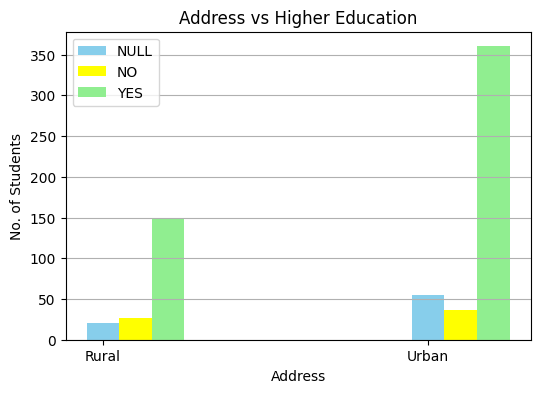

In [14]:
counts = pd.crosstab(df['address'], df['higher'])
yesCount = counts['yes'].values
noCount = counts['no'].values
nullCount = counts['NULL'].values

plt.figure(figsize = (6, 4))
address = ['Rural', 'Urban']
x = np.arange(len(address))
plt.bar(address, nullCount, width=0.1, color='skyblue', label= 'NULL')
plt.bar(x+0.1, noCount, width=0.1, color='yellow', label= 'NO')
plt.bar(x+0.2, yesCount, width=0.1, color='lightgreen', label='YES')
plt.legend(loc='upper left')
plt.grid(axis='y')
plt.xlabel('Address')
plt.ylabel('No. of Students')
plt.title('Address vs Higher Education')
plt.show()

Q2. Does weekday alcohol consumption affect the grades of the students?

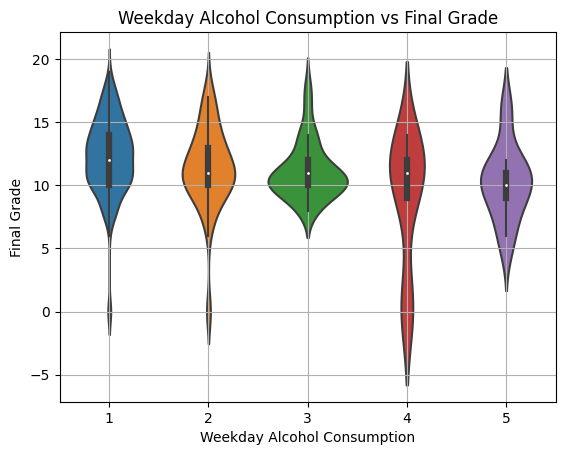

In [15]:
sns.violinplot(x='Dalc', y='G3', data=df)
plt.title('Weekday Alcohol Consumption vs Final Grade')
plt.xlabel('Weekday Alcohol Consumption')
plt.ylabel('Final Grade')
plt.grid(True)
plt.show()

Q3. Does number of school absences affect grades?

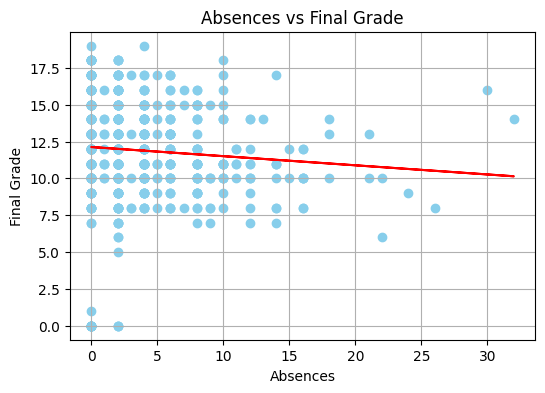

In [16]:
ab = df['absences']
grade = df['G3']

slope, intercept = np.polyfit(ab, grade, 1)  
regression_line = slope * ab + intercept

plt.figure(figsize=(6, 4))
plt.scatter(ab, grade, color='skyblue')
plt.plot(ab, regression_line, color='red')
plt.title('Absences vs Final Grade')
plt.xlabel('Absences')
plt.ylabel('Final Grade')
plt.grid()
plt.show()

Tried making a line chart for the same, but turned out to be quite messy. So tried scatter chart.

In [ ]:
'''
ab = df['absences']
grade = df['G3']
plt.plot(ab, grade)
'''

Q4. Is there a correlation between studytime and grades?

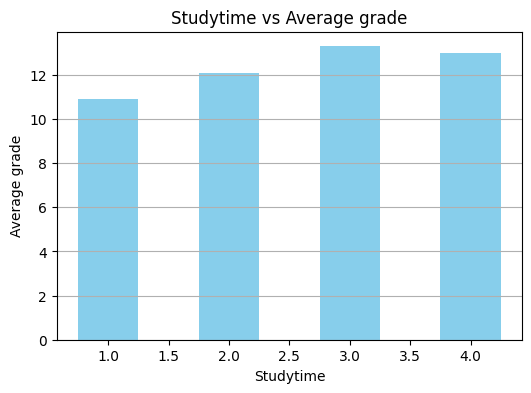

In [17]:
gradeAvg = df.groupby('studytime')['G3'].mean()
x = gradeAvg.index         
y = gradeAvg.values        
plt.figure(figsize=(6, 4))
plt.bar(x, y, color='skyblue', width = 0.5)
plt.title('Studytime vs Average grade')
plt.xlabel('Studytime')
plt.ylabel('Average grade')
plt.grid(axis='y')
plt.show()

Q5. Are students with higher grades romantic?

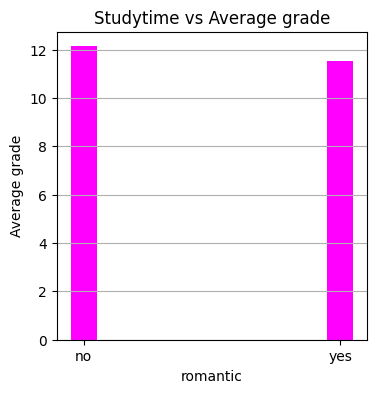

In [18]:
gradeAvg = df.groupby('romantic')['G3'].mean()
x = gradeAvg.index         
y = gradeAvg.values        
plt.figure(figsize=(4, 4))
plt.bar(x, y, color='magenta', width = 0.1)
plt.title('Studytime vs Average grade')
plt.xlabel('romantic')
plt.ylabel('Average grade')
plt.xticks([0,1])
plt.grid(axis='y')
plt.show()

# Level 4

Encoding the data in categorical columns

In [19]:
from sklearn.preprocessing import LabelEncoder
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [ ]:
df

Splitting the target column (romantic) from the dataframe.

In [20]:
df1=df.drop('romantic', axis=1)
t = df['romantic']

Splitting the dataset into train set and test set.

In [21]:
from sklearn.model_selection import train_test_split

df1_train, df1_test, t_train, t_test = train_test_split(df1, t, test_size=0.2, random_state=1, stratify=t)

In [ ]:
df1_train

Impelenting **Decision Trees**

In [22]:
from sklearn.tree import DecisionTreeClassifier
a = DecisionTreeClassifier(random_state=1)
a.fit(df1_train, t_train)

DecisionTreeClassifier(random_state=1)

In [23]:
from sklearn.metrics import accuracy_score, classification_report
t1_pred = a.predict(df1_test)
print("Accuracy:", accuracy_score(t_test, t1_pred))
print(classification_report(t_test, t1_pred))

Accuracy: 0.5692307692307692
              precision    recall  f1-score   support

           0       0.68      0.61      0.64        82
           1       0.43      0.50      0.46        48

    accuracy                           0.57       130
   macro avg       0.55      0.55      0.55       130
weighted avg       0.58      0.57      0.57       130



Implementing **Random Forests**

In [24]:
from sklearn.ensemble import RandomForestClassifier
b = RandomForestClassifier()
b.fit(df1_train, t_train)

RandomForestClassifier()

In [25]:
from sklearn.metrics import accuracy_score, classification_report
pred2 = b.predict(df1_test)
print("Accuracy:", accuracy_score(t_test, pred2))
print(classification_report(t_test, pred2))

Accuracy: 0.6230769230769231
              precision    recall  f1-score   support

           0       0.65      0.89      0.75        82
           1       0.47      0.17      0.25        48

    accuracy                           0.62       130
   macro avg       0.56      0.53      0.50       130
weighted avg       0.58      0.62      0.56       130



Implementing **Logistic Regression**

In [27]:
from sklearn.linear_model import LogisticRegression
c = LogisticRegression(max_iter=500)
c.fit(df1_train, t_train)

LogisticRegression(max_iter=500)

In [28]:
from sklearn.metrics import accuracy_score, classification_report
pred3 = c.predict(df1_test)
print("Accuracy:", accuracy_score(t_test, pred3))
print(classification_report(t_test, pred3))

Accuracy: 0.676923076923077
              precision    recall  f1-score   support

           0       0.68      0.91      0.78        82
           1       0.65      0.27      0.38        48

    accuracy                           0.68       130
   macro avg       0.67      0.59      0.58       130
weighted avg       0.67      0.68      0.63       130



# Level 5

In [29]:
import shap

In [31]:
import xgboost as xgb
model = xgb.XGBClassifier(objective="binary:logistic")
model.fit(df1_train, t_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [33]:
explainer = shap.Explainer(model)
shap_values = explainer(df1_train)
print(shap_values.shape)

(519, 32)


for student who predicted **"NO"**

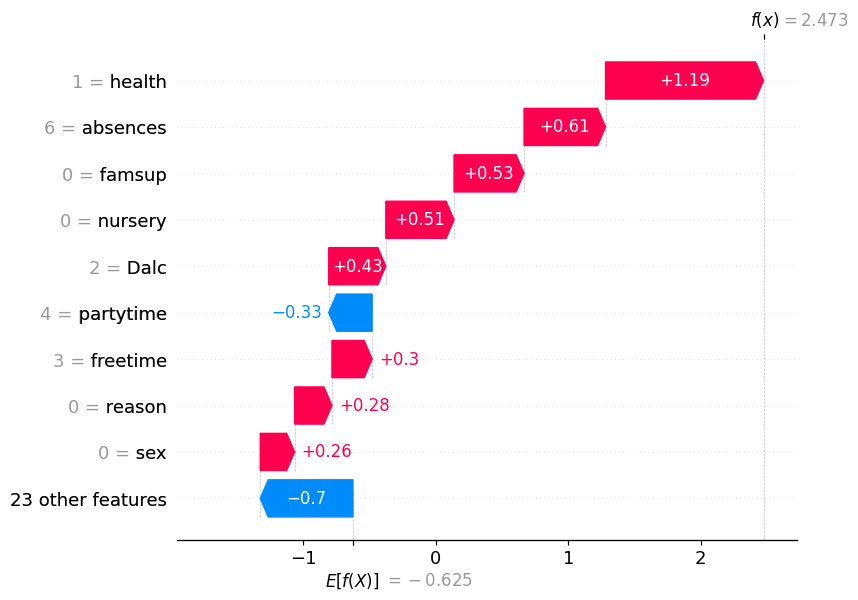

In [34]:
shap.plots.waterfall(shap_values[0])

Model output is 2.473, which is positive, so the model favours the decision of the student which was "NO".

For student who predicted **"YES"**

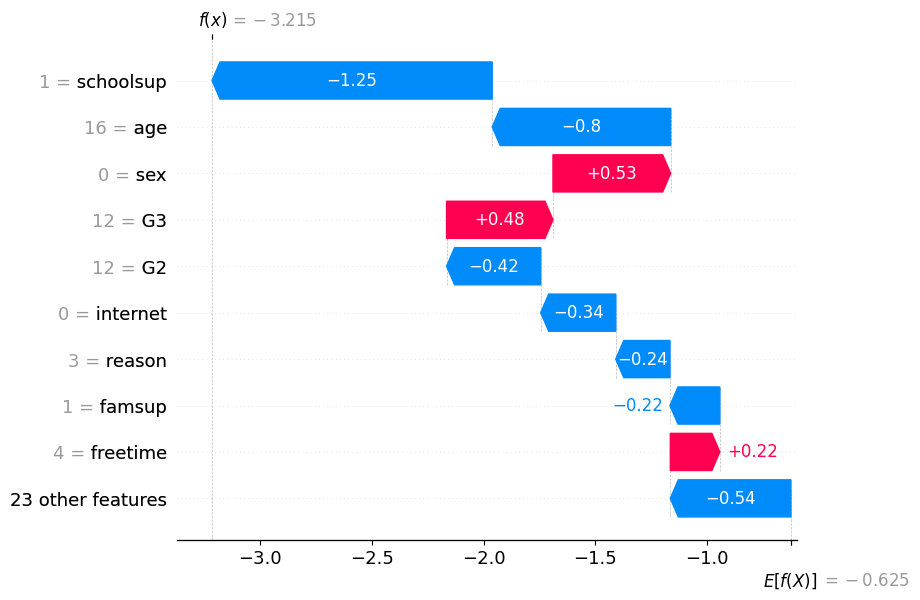

In [38]:
shap.plots.waterfall(shap_values[1])

Model output is -3.215, which is negative. So the model does not favour the choice of the student that was "YES".